# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [4]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


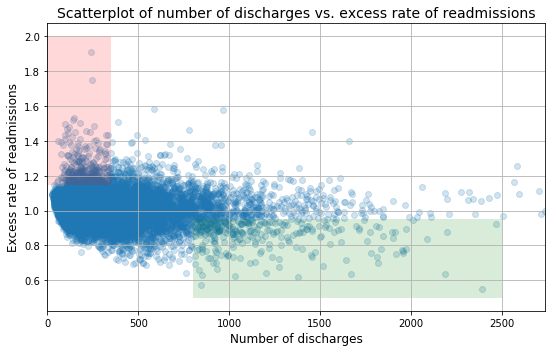

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

# My comments on the preliminary report<br>
A. I disagree with the preliminary report in a few regards.
- Overall, rate of admissions appears NOT to correlate with the number of discharges
- It is hard to conclude from the above plot alone if the "frequency" of excess rates of readdmissions are higher with the lower number of discharges, because there are more number of hospitals in the lower range along the x-axis (i.e. number of discharges)
- The same thing can be said for the part of the data indicated in the shaded green. This time, the overall number of datapoints in that range of x-axis is small, and the "frequency" of lower rates of readmission is not obviously clear
B. The numbers the author chose for the cut-offs for number of discharges seems arbitrary and the rationale was not clear. Also, the analysis does not include any analysis on significance of difference
C. For above reasons, I cannot support these conclusions.
D. Again, no conclusions can be drawn from the insufficientt analysis<br>

<b>Please skip to the bottom for my analysis!</b><br><br>

In [7]:
# Your turn
import scipy.stats as scs

In [8]:
data = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']]
data.dropna()
data.columns = ['discharges', 'readmission_ratio']

In [9]:
data = data[data['readmission_ratio'].notnull()]

In [10]:
data.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

,discharges,readmission_ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
90%,726.400000,1.112800
99%,1516.080000,1.271704
max,6793.000000,1.909500


In [11]:
# There are only 19 cases where number of discharges are above 2300
len(data[data.discharges > 2300])

19

Based on the above, I will keep on splitting the dataset at a give cutoff number, and analyze the sample below and above the cutoff are statistically different from each other. But first, I need to check if those split samples are normally distributed or not.

In [12]:
# Set up lists to store results
cutoffs = []
counter = []
normality = []
both_normal = []

# Initial counter and cutoff
i = 0
cutoff = 100

# Keep on splitting the sample until 90% of the sample is in one side
while cutoff < 2300:
    counter.append(i)
    cutoffs.append(cutoff)
    
    # Split the data into two
    smaller = data[data['discharges'] < cutoff]
    higher = data[data['discharges'] >= cutoff]
    
    # Do normality test for each
    if scs.normaltest(smaller['readmission_ratio'])[1] >= 0.05:
        smaller_normality = 1
    else:
        smaller_normality = 0
    
    if scs.normaltest(higher['readmission_ratio'])[1] >= 0.05:
        higher_normality = 1
    else:
        higher_normality = 0
    
    normaltest_result = [smaller_normality, higher_normality]
    normality.append(normaltest_result)
    
    # Check if both sets are normaly distributed or not
    if (smaller_normality == 1) and (higher_normality == 1):
        both_normal_or_not = 1
    else:
        both_normal_or_not = 0
    
    both_normal.append(both_normal_or_not)    
    
    i += 1
    cutoff += 100    

In [13]:
print('number of cuts %d' % len(cutoffs))
print('number of cuts with both normal %d' % np.sum(both_normal))

number of cuts 22
number of cuts with both normal 0


So number of the splits yielded two sets that are both normally distributed. Thus I'll emply t-test and Mann_Whiteny U test.

In [40]:
# Set up lists to store results
cutoffs = []
counter = []
t_pvalues = []
t_significance = []
smaller_means = []
higher_means = []
smaller_mean_1ornot_pvals = []
higher_mean_1ornot_pvals = []
mw_pvalues = []
mw_significance = []

# Initial counter and cutoff
i = 0
cutoff = 100

# Keep on splitting the sample until 90% of the sample is in one side
while cutoff < 2300:
    counter.append(i)
    cutoffs.append(cutoff)
    
    # Split the data into two
    smaller = data[data['discharges'] < cutoff]
    higher = data[data['discharges'] >= cutoff]
    
    # Do test and store p-values
    t_pvalue = scs.ttest_ind(smaller['readmission_ratio'], higher['readmission_ratio'])[1]
    mw_pvalue = scs.mannwhitneyu(smaller['readmission_ratio'], higher['readmission_ratio'])[1]
    
    t_pvalues.append(t_pvalue)
    mw_pvalues.append(mw_pvalue)
    
    # Decide if significantly different based on the test (1 = significantly different)
    t_sig = int(t_pvalue < 0.01)
    mw_sig = int(mw_pvalue < 0.01)
    
    t_significance.append(t_sig)
    mw_significance.append(mw_sig)
    
    # Test by t-test if the mean of the sample population is different from 1.0
    smaller_mean_result = scs.ttest_1samp(smaller['readmission_ratio'], 1.0)[1]
    higher_mean_result = scs.ttest_1samp(higher['readmission_ratio'], 1.0)[1]
    
    smaller_mean_1ornot_pvals.append(smaller_mean_result)
    higher_mean_1ornot_pvals.append(higher_mean_result)
    
    smaller_means.append(np.mean(smaller['readmission_ratio']))
    higher_means.append(np.mean(higher['readmission_ratio']))
    
    i += 1
    cutoff += 100

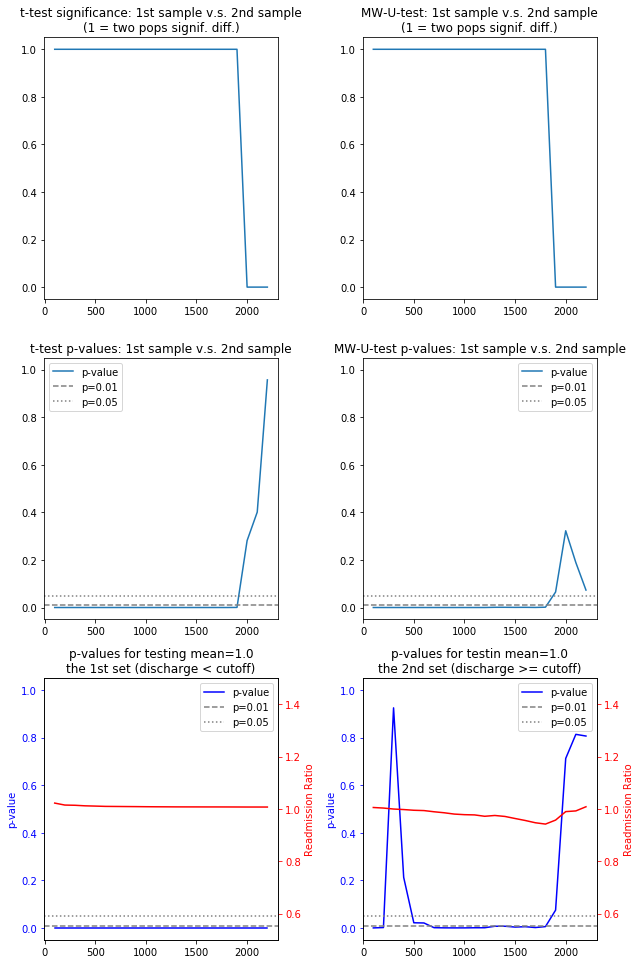

In [55]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(9, 13.5))
ax1.plot(cutoffs, t_significance)
ax1.set_title('t-test significance: 1st sample v.s. 2nd sample\n(1 = two pops signif. diff.)')
ax1.set_ylim([-0.05, 1.05])

ax2.plot(cutoffs, mw_significance)
ax2.set_title('MW-U-test: 1st sample v.s. 2nd sample\n(1 = two pops signif. diff.)')
ax2.set_ylim([-0.05, 1.05])

ax3.plot(cutoffs, t_pvalues, label='p-value')
ax3.set_title('t-test p-values: 1st sample v.s. 2nd sample')
ax3.set_ylim([-0.05, 1.05])
ax3.axhline(y=0.01, ls='--', c='0.5', label='p=0.01')
ax3.axhline(y=0.05, ls=':', c='0.5', label='p=0.05')
ax3.legend()

ax4.plot(cutoffs, mw_pvalues, label='p-value')
ax4.set_title('MW-U-test p-values: 1st sample v.s. 2nd sample')
ax4.set_ylim([-0.05, 1.05])
ax4.axhline(y=0.01, ls='--', c='0.5', label='p=0.01')
ax4.axhline(y=0.05, ls=':', c='0.5', label='p=0.05')
ax4.legend()

ax5.plot(cutoffs, smaller_mean_1ornot_pvals, c='b', label='p-value')
ax5.axhline(y=0.01, ls='--', c='0.5', label='p=0.01')
ax5.axhline(y=0.05, ls=':', c='0.5', label='p=0.05')
ax5.set_title('p-values for testing mean=1.0\nthe 1st set (discharge < cutoff)')
ax5.set_ylabel('p-value', color='b')
ax5.set_ylim([-0.05, 1.05])
ax5.legend()
ax5.tick_params('y', colors='b')

ax5_1 = ax5.twinx()
ax5_1.plot(cutoffs, smaller_means, c='r', label='Mean of 1st Set')
ax5_1.set_ylim([0.5, 1.5])
ax5_1.set_ylabel('Readmission Ratio', color='r')
ax5_1.tick_params('y', colors='r')

ax6.plot(cutoffs, higher_mean_1ornot_pvals, c='b', label='p-value')
ax6.axhline(y=0.01, ls='--', c='0.5', label='p=0.01')
ax6.axhline(y=0.05, ls=':', c='0.5', label='p=0.05')
ax6.set_title('p-values for testin mean=1.0\nthe 2nd set (discharge >= cutoff)')
ax6.set_ylabel('p-value', color='b')
ax6.set_ylim([-0.05, 1.05])
ax6.legend()
ax6.tick_params('y', colors='b')
ax6_1 = ax6.twinx()
ax6_1.plot(cutoffs, higher_means, c='r', label='Mean of 2nd Set')
ax6_1.set_ylim([0.5, 1.5])
ax6_1.set_ylabel('Readmission Ratio', color='r')
ax6_1.tick_params('y', colors='r')


plt.tight_layout()

### Exercise (copied from above)

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

# Here is my approach<br>
- For a given cutoff for the number of discharges, split samples into two sets: one with number of discharages smaller than the cutoff, and another with number of discharges equal to or higher
- First, check for normality of those split samples. In my case, most split resulted in either or both of the sample being non-normally distributed. 
- Based on the normality test, t-test and Mann-Whiteny U test were employed to test if the split samples are disributed different from each other. If they're significantly different, score of 1 is reported and if not, 0. p-value for each test was recorded
- Then, the split samples were individually tested by t-test if their means for readmission ratio are significantly different than 1.0. Their means and p-values from the test werer recorded
- The above procedure was repeated for different cutoff points, and the results are reported in the graphs above

# Response to specific tasks above<br>
1. See above
2. p-values are reported on the graphs, for testing significance of different between two split sets and for testing deviation of readmission rate being 1.0
3. Same as point2
4. - Significance for testing the two sets are reported in the graphs above (significant difference at 0.01 level reported as 1, if not significant, 0). When the cutoff was set below ~1700 discharges, two split sets were significantly different from each other, but above that, not. 
- Significance for testing the means of the split samples can be visually inspected in the two panles at the bottom. Any point above the significance lines (0.05 or 0.01) indicate no significant deviation from readmission rate mean of 1.0. For all the cutoffs, the sample below the cutoff had a mean that were significantly different than 1.0. For the sample higher than the cutoff, significance varied. if the cutoff were set between ~100~500, or above ~1700, the mean was not significantly differnt from 1.0. In other cases, the mean was different from 1.0
- The statistical significance discussed above is practically unhelpful here. The plot of the means of those split samples (the bottom two panels, red lines) indicate that whatever the cutoff is, the mean for both split setes virtually stay flat at 1.0, suggesting that the left side and right side of the scatter plot have similar distribution and mean of readmission ratio at ~1.0.
5. See the graph below. The readmission ratio is tightly disributed, symmetrically around ~1.0

(array([   1.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.,    0.,    1.,    3.,    0.,    2.,
           0.,    0.,    1.,    1.,    1.,    0.,    2.,    1.,    2.,
           7.,    3.,    1.,    2.,    6.,    4.,    6.,    7.,    5.,
          10.,   10.,    6.,    5.,   10.,   12.,   13.,    8.,   11.,
          11.,   14.,   13.,   13.,   14.,   27.,   30.,   28.,   39.,
          39.,   37.,   33.,   55.,   68.,   71.,   89.,   95.,   89.,
          98.,  113.,  149.,  147.,  168.,  159.,  189.,  225.,  209.,
         215.,  266.,  271.,  286.,  277.,  306.,  331.,  316.,  307.,
         338.,  334.,  317.,  305.,  320.,  308.,  291.,  303.,  285.,
         281.,  253.,  233.,  237.,  228.,  229.,  195.,  180.,  149.,
         162.,  150.,  128.,  112.,  113.,   91.,   88.,   70.,   82.,
          67.,   61.,   64.,   36.,   36.,   36.,   46.,   26.,   35.,
          29.,   24.,   21.,   17.,   21.,   20.,   15.,   17.,   19.,
      

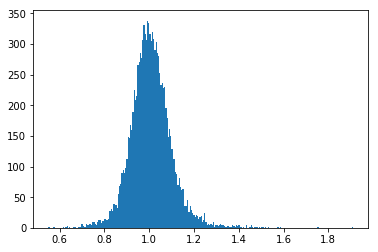

In [61]:
plt.hist(data['readmission_ratio'], bins=250)